In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from itertools import product, combinations
import glob
# Credits to Ajayan, Akshitha
# import modules used here -- sys is a very standard one
import sys

def drawmyobject(x,y):
    plt.plot((x[0], x[1]), (y[0], y[1]), 'r')
    plt.plot((x[1], x[2]), (y[1], y[2]), 'r')
    plt.plot((x[2], x[3]), (y[2], y[3]), 'r')
    plt.plot((x[3], x[0]), (y[3], y[0]), 'r')
    plt.plot((x[0], x[4]), (y[0], y[4]), 'r')
    plt.plot((x[1], x[5]), (y[1], y[5]), 'r')
    plt.plot((x[2], x[6]), (y[2], y[6]), 'r')
    plt.plot((x[3], x[7]), (y[3], y[7]), 'r')
    plt.plot((x[4], x[8]), (y[4], y[8]), 'r')
    plt.plot((x[5], x[8]), (y[5], y[8]), 'r')
    plt.plot((x[6], x[8]), (y[6], y[8]), 'r')
    plt.plot((x[7], x[8]), (y[7], y[8]), 'r')
    plt.plot((x[4], x[5]), (y[4], y[5]), 'r')
    plt.plot((x[5], x[6]), (y[5], y[6]), 'r')
    plt.plot((x[6], x[7]), (y[6], y[7]), 'r')
    plt.plot((x[7], x[4]), (y[7], y[4]), 'r')

def main():

    print "\n\nPROBLEM 1:\n"

    r = [-1, 1]

    points = [[0, 0, 0],
            [0, 0, 1],
            [1, 0, 1],
            [1, 0, 0],
            [0, 1, 0],
            [0, 1, 1],
            [1, 1, 1],
            [1, 1, 0],
            [0.5, 2, 0.5]]

    points = np.array(points)

    R = [[-0.707, -0.707, 0],
        [0.707, -0.707, 0],
        [0, 0, 1]]

    t = [3,
        0.5,
        3]

    Ma = [[-0.707, -0.707, 0, 3],
        [0.707, -0.707, 0, 0.5],
        [0, 0, 1, 3]]

    K = [[100, 0, 200],
        [-0, 100, 200],
        [0, 0, 1]]

    print "The original house coordinates are: \n"+str(points)

    temp = []
    for j in range(0, 9):
        X = []
        for i in range(0, 3):
            X.append(points[j, i])
        X.append(1)
        #print X
        #print m
        temp.append(np.matmul(np.asarray(K), (np.matmul(np.asarray(Ma), np.asarray(X)))))

    #print temp

    temp = np.asarray(temp)
    xa = []
    ya = []
    for i in range(0, 9):
         xa.append(temp[i, 0]/temp[i, 2])
         ya.append(temp[i, 1]/temp[i, 2])

    drawmyobject(xa,ya)

    plt.draw()
    plt.waitforbuttonpress(0) # this will wait for indefinite time
    plt.close()

    R = [[0.707, 0.707, 0],
        [-0.707, 0.707, 0],
        [0, 0, 1]]

    t = [3,
        0.5,
        3]

    Mb = [[0.707, 0.707, 0, 3],
        [-0.707, 0.707, 0, 0.5],
        [0, 0, 1, 3]]

    K = [[100, 0, 200],
        [-0, 100, 200],
        [0, 0, 1]]

    temp = []
    for j in range(0, 9):
        X = []
        for i in range(0, 3):
            X.append(points[j, i])
        X.append(1)
        #print X
        #print m
        temp.append(np.matmul(np.asarray(K), (np.matmul(np.asarray(Mb), np.asarray(X)))))

    #print temp

    temp = np.asarray(temp)
    xb = []
    yb = []
    for i in range(0, 9):
         xb.append(temp[i, 0]/temp[i, 2])
         yb.append(temp[i, 1]/temp[i, 2])

    drawmyobject(xb,yb)

    plt.draw()
    plt.waitforbuttonpress(0) # this will wait for indefinite time
    plt.close()

    Ca = np.matmul(np.asarray(K), np.asarray(Ma))
    Cb = np.matmul(np.asarray(K), np.asarray(Mb))

    A = []

    A.append((xa[0]*Ca[2,:])-Ca[0,:])
    A.append((ya[0]*Ca[2,:])-Ca[1,:])
    A.append((xb[0]*Cb[2,:])-Cb[0,:])
    A.append((yb[0]*Cb[2,:])-Cb[1,:])

    A = np.reshape(np.asarray(A), (4,4))

    U, S, V = np.linalg.svd(A)
    V = np.transpose(V)
    recon = [V[0,-1], V[1,-1], V[2,-1]]
    recon = recon/V[3,-1]  
    print("The reconstructed point is: " + str(recon))
    error = [recon[0]-points[0,0], recon[1]-points[0,1],recon[2]-points[0,2]]
    print("The reprojection error is: " + str(error[0]+error[1]+error[2]))

    A = []

    A.append((xa[1]*Ca[2,:])-Ca[0,:])
    A.append((ya[1]*Ca[2,:])-Ca[1,:])
    A.append((xb[1]*Cb[2,:])-Cb[0,:])
    A.append((yb[1]*Cb[2,:])-Cb[1,:])

    A = np.reshape(np.asarray(A), (4,4))

    U, S, V = np.linalg.svd(A)
    V = np.transpose(V)
    recon = [V[0,-1], V[1,-1], V[2,-1]]
    recon = recon/V[3,-1] 
    print("The reconstructed point is: " + str(recon))
    error = [recon[0]-points[1,0], recon[1]-points[1,1],recon[2]-points[1,2]]
    print("The reprojection error is: " + str(error[0]+error[1]+error[2]))

    A = []

    A.append((xa[2]*Ca[2,:])-Ca[0,:])
    A.append((ya[2]*Ca[2,:])-Ca[1,:])
    A.append((xb[2]*Cb[2,:])-Cb[0,:])
    A.append((yb[2]*Cb[2,:])-Cb[1,:])

    A = np.reshape(np.asarray(A), (4,4))

    U, S, V = np.linalg.svd(A)
    V = np.transpose(V)
    recon = [V[0,-1], V[1,-1], V[2,-1]] 
    recon = recon/V[3,-1] 
    print("The reconstructed point is: " + str(recon))
    error = [recon[0]-points[2,0], recon[1]-points[2,1],recon[2]-points[2,2]]
    print("The reprojection error is: " + str(error[0]+error[1]+error[2]))

    print "\n\n PROBLEM 2:\n"

    z0 = raw_input("Enter angle of rotation for base (in degrees): ")
    x1 = raw_input("Enter angle of rotation for joint 1 (in degrees): ")
    x2 = raw_input("Enter angle of rotation for joint 2 (in degrees): ")
    z3 = raw_input("Enter angle of rotation for joint 3 (in degrees): ")

    z0 = float(z0)
    x1 = float(x1)
    x2 = float(x2)
    z3 = float(z3)

    T01 = np.array([[1, 0, 0, 10],
                    [0, np.cos(x1*np.pi/180), -np.sin(x1*np.pi/180), 0],
                    [0, np.sin(x1*np.pi/180), np.cos(x1*np.pi/180), 0],
                    [0, 0, 0, 1]])

    T12 = np.array([[1, 0, 0, 0],
                    [0, np.cos(x2*np.pi/180), -np.sin(x2*np.pi/180), 0],
                    [0, np.sin(x2*np.pi/180), np.cos(x2*np.pi/180), 20],
                    [0, 0, 0, 1]])

    T23 = np.array([[np.cos(z3*np.pi/180), -np.sin(z3*np.pi/180), 0, 0],
                    [np.sin(z3*np.pi/180), np.cos(z3*np.pi/180), 0, 0],
                    [0, 0, 1, 15],
                    [0, 0, 0, 1]])

    T03 = np.matmul(T01, np.matmul(T12, T23))

    print("The 0T1 matrix is: \n" + str(T01[0:3, :]))
    print("The 1T2 matrix is: \n" + str(T12[0:3, :]))
    print("The 2T3 matrix is: \n" + str(T23[0:3, :]))
    print("The 0T3 matrix is: \n" + str(T03[0:3, :]))
    print("The location of the wrist wrt to base: \n" + str(T03[0:3, 3]))

    

    print "\n\n PROBLEM 4:\n"

    U, S, V = np.linalg.svd(M)
    V = np.transpose(V)
    t = [[V[0,-1]/V[3,-1]], [V[1,-1]/V[3,-1]], [V[2,-1]/V[3,-1]]]
    t = np.asarray(t)

    q,r = np.linalg.qr(np.linalg.inv(M[0:3,0:3]))

    q = np.linalg.inv(q)

    t = np.matmul(-1*q, t)

    T = np.array([[q[0,0], q[0,1], q[0,2], t[0,0]],
                [q[1,0], q[1,1], q[1,2], t[1,0]],
                [q[2,0], q[2,1], q[2,2], t[2,0]]])

    print "The K matrix is: \n" + str(np.linalg.inv(r))
    print "The wTc matrix is: \n" + str(T)

# Standard boilerplate to call the main() function to begin
# the program.
if __name__ == '__main__':
	main()

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(int "\n\nPROBLEM 1:\n")? (<ipython-input-1-4e8ac4dfc684>, line 30)



PROBLEM 1:

The original house coordinates are: 
[[ 0.   0.   0. ]
 [ 0.   0.   1. ]
 [ 1.   0.   1. ]
 [ 1.   0.   0. ]
 [ 0.   1.   0. ]
 [ 0.   1.   1. ]
 [ 1.   1.   1. ]
 [ 1.   1.   0. ]
 [ 0.5  2.   0.5]]


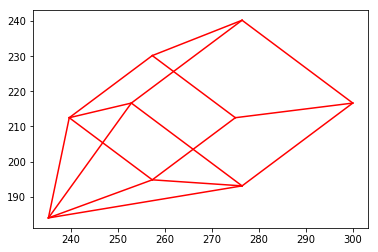

KeyboardInterrupt: 

In [12]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from itertools import product, combinations
import glob
# Credits to Ajayan, Akshitha
# import modules used here -- sys is a very standard one
import sys

def drawmyobject(x,y):
    plt.plot((x[0], x[1]), (y[0], y[1]), 'r')
    plt.plot((x[1], x[2]), (y[1], y[2]), 'r')
    plt.plot((x[2], x[3]), (y[2], y[3]), 'r')
    plt.plot((x[3], x[0]), (y[3], y[0]), 'r')
    plt.plot((x[0], x[4]), (y[0], y[4]), 'r')
    plt.plot((x[1], x[5]), (y[1], y[5]), 'r')
    plt.plot((x[2], x[6]), (y[2], y[6]), 'r')
    plt.plot((x[3], x[7]), (y[3], y[7]), 'r')
    plt.plot((x[4], x[8]), (y[4], y[8]), 'r')
    plt.plot((x[5], x[8]), (y[5], y[8]), 'r')
    plt.plot((x[6], x[8]), (y[6], y[8]), 'r')
    plt.plot((x[7], x[8]), (y[7], y[8]), 'r')
    plt.plot((x[4], x[5]), (y[4], y[5]), 'r')
    plt.plot((x[5], x[6]), (y[5], y[6]), 'r')
    plt.plot((x[6], x[7]), (y[6], y[7]), 'r')
    plt.plot((x[7], x[4]), (y[7], y[4]), 'r')



print("\n\nPROBLEM 1:\n")

r = [-1, 1]

points = [[0, 0, 0],
        [0, 0, 1],
        [1, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 1],
        [1, 1, 1],
        [1, 1, 0],
        [0.5, 2, 0.5]]

points = np.array(points)

R = [[-0.707, -0.707, 0],
    [0.707, -0.707, 0],
    [0, 0, 1]]

t = [3,
    0.5,
    3]

Ma = [[-0.707, -0.707, 0, 3],
    [0.707, -0.707, 0, 0.5],
    [0, 0, 1, 3]]

K = [[100, 0, 200],
    [-0, 100, 200],
    [0, 0, 1]]

print("The original house coordinates are: \n"+str(points))

temp = []
for j in range(0, 9):
    X = []
    for i in range(0, 3):
        X.append(points[j, i])
    X.append(1)
    #print X
    #print m
    temp.append(np.matmul(np.asarray(K), (np.matmul(np.asarray(Ma), np.asarray(X)))))

#print temp

temp = np.asarray(temp)
xa = []
ya = []
for i in range(0, 9):
     xa.append(temp[i, 0]/temp[i, 2])
     ya.append(temp[i, 1]/temp[i, 2])

drawmyobject(xa,ya)

plt.show()

R = [[0.707, 0.707, 0],
    [-0.707, 0.707, 0],
    [0, 0, 1]]

t = [3,
    0.5,
    3]

Mb = [[0.707, 0.707, 0, 3],
    [-0.707, 0.707, 0, 0.5],
    [0, 0, 1, 3]]

K = [[100, 0, 200],
    [-0, 100, 200],
    [0, 0, 1]]

temp = []
for j in range(0, 9):
    X = []
    for i in range(0, 3):
        X.append(points[j, i])
    X.append(1)
    #print X
    #print m
    temp.append(np.matmul(np.asarray(K), (np.matmul(np.asarray(Mb), np.asarray(X)))))

#print temp

temp = np.asarray(temp)
xb = []
yb = []
for i in range(0, 9):
     xb.append(temp[i, 0]/temp[i, 2])
     yb.append(temp[i, 1]/temp[i, 2])

drawmyobject(xb,yb)

plt.draw()
plt.waitforbuttonpress(0) # this will wait for indefinite time
plt.close()

Ca = np.matmul(np.asarray(K), np.asarray(Ma))
Cb = np.matmul(np.asarray(K), np.asarray(Mb))

A = []

A.append((xa[0]*Ca[2,:])-Ca[0,:])
A.append((ya[0]*Ca[2,:])-Ca[1,:])
A.append((xb[0]*Cb[2,:])-Cb[0,:])
A.append((yb[0]*Cb[2,:])-Cb[1,:])

A = np.reshape(np.asarray(A), (4,4))

U, S, V = np.linalg.svd(A)
V = np.transpose(V)
recon = [V[0,-1], V[1,-1], V[2,-1]]
recon = recon/V[3,-1]  
print("The reconstructed point is: " + str(recon))
error = [recon[0]-points[0,0], recon[1]-points[0,1],recon[2]-points[0,2]]
print("The reprojection error is: " + str(error[0]+error[1]+error[2]))

A = []

A.append((xa[1]*Ca[2,:])-Ca[0,:])
A.append((ya[1]*Ca[2,:])-Ca[1,:])
A.append((xb[1]*Cb[2,:])-Cb[0,:])
A.append((yb[1]*Cb[2,:])-Cb[1,:])

A = np.reshape(np.asarray(A), (4,4))

U, S, V = np.linalg.svd(A)
V = np.transpose(V)
recon = [V[0,-1], V[1,-1], V[2,-1]]
recon = recon/V[3,-1] 
print("The reconstructed point is: " + str(recon))
error = [recon[0]-points[1,0], recon[1]-points[1,1],recon[2]-points[1,2]]
print("The reprojection error is: " + str(error[0]+error[1]+error[2]))

A = []

A.append((xa[2]*Ca[2,:])-Ca[0,:])
A.append((ya[2]*Ca[2,:])-Ca[1,:])
A.append((xb[2]*Cb[2,:])-Cb[0,:])
A.append((yb[2]*Cb[2,:])-Cb[1,:])

A = np.reshape(np.asarray(A), (4,4))

U, S, V = np.linalg.svd(A)
V = np.transpose(V)
recon = [V[0,-1], V[1,-1], V[2,-1]] 
recon = recon/V[3,-1] 
print("The reconstructed point is: " + str(recon))
error = [recon[0]-points[2,0], recon[1]-points[2,1],recon[2]-points[2,2]]
print("The reprojection error is: " + str(error[0]+error[1]+error[2]))

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from itertools import product, combinations
import glob
print("\n\n PROBLEM 3:\n")

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((4*4,3), np.float32)
objp[:,:2] = np.mgrid[0:4,0:4].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
path = 'O:\\Photographs\\20181019'
images=glob.glob(path + '\\*.JPG')
print(images)
#print "The shape is: " + str(np.shape(np.asarray(images)))

for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (4,4), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (10,10), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (5,5), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)
cv.destroyAllWindows()

ret, K, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
dst = np.zeros((3,3))
cv.Rodrigues(np.asarray(rvecs[0]), dst)
t = np.asarray(tvecs[0])
T = np.array([[dst[0,0], dst[0,1], dst[0,2], t[0,0]],
    [dst[1,0], dst[1,1], dst[1,2], t[1,0]],
    [dst[2,0], dst[2,1], dst[2,2], t[2,0]]])

print("The first wTc matrix is: \n" + str(T))
print("The K matrix is: \n" + str(K))

M = np.matmul(K, T)
print("The camera matrix is: \n" + str(M))



 PROBLEM 3:

['O:\\Photographs\\20181019\\Photo on 10-17-18 at 10.16 PM #2.jpg', 'O:\\Photographs\\20181019\\Photo on 10-17-18 at 10.17 PM #2.jpg', 'O:\\Photographs\\20181019\\Photo on 10-17-18 at 10.17 PM #3.jpg', 'O:\\Photographs\\20181019\\Photo on 10-17-18 at 10.17 PM #4.jpg', 'O:\\Photographs\\20181019\\Photo on 10-17-18 at 10.17 PM #5.jpg', 'O:\\Photographs\\20181019\\Photo on 10-17-18 at 10.17 PM.jpg', 'O:\\Photographs\\20181019\\Photo on 10-17-18 at 10.18 PM #2.jpg', 'O:\\Photographs\\20181019\\Photo on 10-17-18 at 10.18 PM #3.jpg', 'O:\\Photographs\\20181019\\Photo on 10-17-18 at 10.18 PM #4.jpg', 'O:\\Photographs\\20181019\\Photo on 10-17-18 at 10.18 PM #5.jpg', 'O:\\Photographs\\20181019\\Photo on 10-17-18 at 10.18 PM #6.jpg', 'O:\\Photographs\\20181019\\Photo on 10-17-18 at 10.18 PM #7.jpg', 'O:\\Photographs\\20181019\\Photo on 10-17-18 at 10.18 PM.jpg', 'O:\\Photographs\\20181019\\Photo on 10-17-18 at 10.19 PM #2.jpg', 'O:\\Photographs\\20181019\\Photo on 10-17-18 at 10.